In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import jax.numpy as jnp

import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data

In [2]:
import jax

In [3]:
size= 200
n_epoches = 8
x_shifts = np.zeros(n_epoches)
x_0 = np.linspace(0,1,size)
y = np.zeros((n_epoches,size))

x = np.empty((n_epoches,size))
for i in range(n_epoches):
    x[i,:] = x_0

In [4]:
%load_ext line_profiler

In [5]:
n = 256

loss_1 = wobble_model.LossFunc('L2Loss')
model  = wobble_model.JnpLin(n,y,x,x_shifts)

In [50]:
%lprun -f wobble_loss.loss_dict[loss_1.func_list[0]] loss_1(model.params,model)

In [51]:
%lprun -f loss_1.__call__ loss_1(model.params,model)

In [20]:
%lprun -f model.forward loss_1(model.params,model)

In [48]:
%lprun -f model.__call__ loss_1(model.params,model)

In [6]:
%lprun -f jax.numpy.interp loss_1(model.params,model)

In [45]:
import time
idx   = np.arange(3,21)
n_all = np.empty(idx.shape,dtype=int)
for i,idx in enumerate(idx):
    n_all[i] = int(2**idx)
print(n_all)
n_epoches = 8
times = []
x_shifts = np.zeros(n_epoches)
for n in n_all:
    size = int(n*3/2)
    
    x_0 = np.linspace(0,1,size)
    y = np.zeros((n_epoches,size))

    x = np.empty((n_epoches,size))
    for i in range(n_epoches):
        x[i,:] = x_0
    
    loss_1 = wobble_model.LossFunc('L2Loss')
    model  = wobble_model.JnpLin(n,y,x,x_shifts)
    
    start = time.time()
    print(loss_1(model.params,model))
    stop = time.time()
    times.append(stop-start)

[      8      16      32      64     128     256     512    1024    2048
    4096    8192   16384   32768   65536  131072  262144  524288 1048576]
48.0
96.0
192.0
384.0
768.0
1536.0
3072.0
6144.0
12288.0
24576.0
49152.0
98304.0
196608.0
393216.0
786432.0
1572864.0
3145728.0
6291456.0


Text(0, 0.5, 'log t')

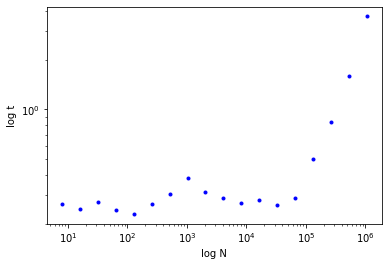

In [46]:
plt.loglog(n_all,times,'.b')
plt.xlabel('log N')
plt.ylabel('log t')

In [12]:
n = 256*256*8
size = int(n*3/2)
    
x_0 = np.linspace(0,1,size)
y = np.zeros((n_epoches,size))

x = np.empty((n_epoches,size))
for i in range(n_epoches):
    x[i,:] = x_0

loss_1 = wobble_model.LossFunc('L2Loss')
model  = wobble_model.JnpLin(n,y,x,x_shifts)

In [31]:
import jax.numpy as jnp
n = 256*256*16
size = int(n*3/2)
    
x_0 = jnp.linspace(0,1,size)
y = jnp.array(np.random.normal(size=(n_epoches,size)))

x = np.zeros((n_epoches,size),dtype=np.float32)
for i in range(n_epoches):
    x[i,:] = x_0
x = jnp.array(x)

loss_1 = wobble_model.LossFunc('L2Loss')
model  = wobble_model.JnpLin(n,y,x,x_shifts)

In [32]:
%lprun -f jax.numpy.interp loss_1(model.params,model)

In [33]:
print(x.dtype)

float32


In [34]:
print(y.dtype)

float32
